# Demilitarization Degree Prediction - EDA
## Nancy Hamdan

In [ ]:
!pip install matplotlib --upgrade

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import plotly.express as px

# Getting the Data

In [ ]:
xls = pd.ExcelFile('AllStatesAndTerritoriesQTR4FY21.xlsx', engine='openpyxl')

In [ ]:
data = pd.DataFrame()

In [ ]:
for name in xls.sheet_names:
    data = pd.concat([data, xls.parse(name)])

In [ ]:
data.head()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
0,AL,ABBEVILLE POLICE DEPT,2540-01-565-4700,BALLISTIC BLANKET KIT,10,Kit,15871.59,D,1.0,2018-01-30,State
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,NaN,2016-06-02,State
2,AL,ABBEVILLE POLICE DEPT,2355-01-553-4634,MINE RESISTANT VEHICLE,1,Each,658000.00,C,1.0,2016-11-09,State
3,AL,ABBEVILLE POLICE DEPT,1240-01-411-1265,"SIGHT,REFLEX",9,Each,333.00,D,1.0,2016-09-14,State
4,AL,ABBEVILLE POLICE DEPT,5855-01-577-7174,"ILLUMINATOR,INFRARED",10,Each,926.00,D,1.0,2017-03-28,State


# Quick Overview of the Data

In [ ]:
len(data)

130958

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130958 entries, 0 to 398
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   State              130958 non-null  object        
 1   Agency Name        130958 non-null  object        
 2   NSN                130958 non-null  object        
 3   Item Name          130958 non-null  object        
 4   Quantity           130958 non-null  int64         
 5   UI                 130958 non-null  object        
 6   Acquisition Value  130958 non-null  float64       
 7   DEMIL Code         130958 non-null  object        
 8   DEMIL IC           121048 non-null  float64       
 9   Ship Date          130958 non-null  datetime64[ns]
 10  Station Type       130958 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 12.0+ MB


* DEMIL IC is the only column with missing values. However, using the information given about the dataset, we know that a blank DEMIL IC corresponds to a non-reviewed DEMIL Code, so no integrity was recorded for that DEMIL Code.
* For the rest of the analysis, a blank DEMIL IC will be replaced by -1.

In [ ]:
data.loc[data['DEMIL IC'].isnull(), 'DEMIL IC'] = -1

In [ ]:
data.loc[data['DEMIL IC'] == -1]

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Ship Date,Station Type
1,AL,ABBEVILLE POLICE DEPT,1240-DS-OPT-SIGH,OPTICAL SIGHTING AND RANGING EQUIPMENT,1,Each,245.88,D,-1.0,2016-06-02,State
11,AL,ADAMSVILLE POLICE DEPT,5860-DS-LAS-ER00,STIMULATED COHERENT RADIATION DEVICES,12,Each,350.00,D,-1.0,2012-05-17,State
24,AL,ADAMSVILLE POLICE DEPT,1005-01-375-8167,"BARREL,SHOTGUN",3,Each,184.43,D,-1.0,2012-05-17,State
29,AL,ADAMSVILLE POLICE DEPT,1005-DS-SWE-PART,WEAPON PARTS,1,Each,50.40,D,-1.0,2012-05-17,State
30,AL,ADAMSVILLE POLICE DEPT,1005-DS-SWE-PART,WEAPON PARTS,1,Each,435.50,D,-1.0,2012-05-17,State
...,...,...,...,...,...,...,...,...,...,...,...
261,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
262,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
263,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State
264,WY,SARATOGA POLICE DEPT,1005-01-D17-2240,"PISTOL, 40CAL, GLOCK GEN 3",1,Each,320.00,D,-1.0,2013-09-19,State


In [ ]:
eda_data = data.copy()
eda_data['DEMIL IC'] = eda_data['DEMIL IC'].astype('object')

In [ ]:
eda_data.describe(datetime_is_numeric=True)

,Quantity,Acquisition Value,Ship Date
count,130958.000000,1.309580e+05,130958
mean,4.180233,1.316023e+04,2011-09-05 01:02:48.702109440
min,0.000000,0.000000e+00,1980-01-01 09:07:07
25%,1.000000,1.380000e+02,2006-05-02 00:00:00
50%,1.000000,4.990000e+02,2012-04-18 00:00:00
75%,1.000000,7.490000e+02,2017-04-17 00:00:00
max,5000.000000,2.200000e+07,2021-09-30 00:00:00
std,31.187727,1.371933e+05,NaN


* Quantity column appears to have outliers, as 75% of the dataset has quantity of 1 but the max quantity is 5000.
* Acquisition Value has outliers too as 75% of the dataset has acquisition value equal to or less than 749 dollars while the maximum is 22,000,000 dollars.
* Ship dates of transfers range from the year 1980 to 2021.

In [ ]:
eda_data.describe(include='object')

,State,Agency Name,NSN,Item Name,UI,DEMIL Code,DEMIL IC,Station Type
count,130958,130958,130958,130958,130958,130958,130958.0,130958
unique,53,5632,10295,4797,32,7,8.0,1
top,CA,TEHAMA CSO,1005-00-073-9421,"RIFLE,5.56 MILLIMETER",Each,D,1.0,State
freq,9489,1402,31543,46843,125920,93478,112444.0,130958


* Most of the dataset has UI=Each. 125920 out of 130958 records are UI=Each.
* Station type is the same for all records, it is "State".
* Over 35% of transfers were of RIFLE,5.56 MILLIMETER items.
* Most of the transfers had a DEMIL code of 'D'.
* Most of the transfers had a DEMIL IC of 1.

# Exploratory Data Analysis

## Setting up a Color Palette

In [ ]:
color_pal = sns.color_palette("deep")
sns.set_palette(color_pal)
color_pal

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

## DEMIL Code, DEMIL IC and Interactions with Other Attributes

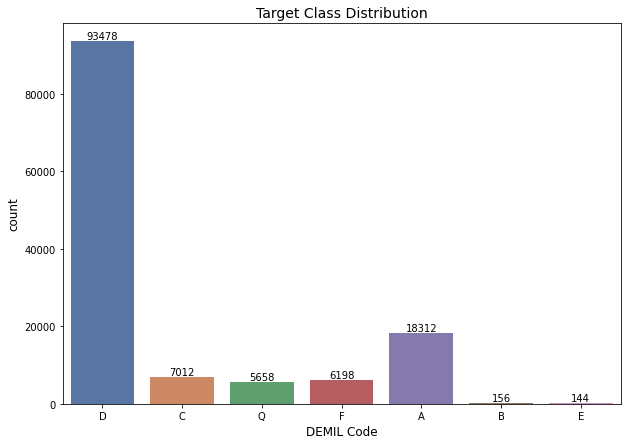

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=data, x='DEMIL Code')
ax.bar_label(ax.containers[0])
ax.set_title('Target Class Distribution', size=14)
ax.set_xlabel('DEMIL Code', size=12)
ax.set_ylabel('count', size=12)
plt.show()

* Class distributions are highly imbalanced with class ‘D’ making more than 71% of the transfers.
* Classes ‘B’ and ‘E’ are especially underrepresented.

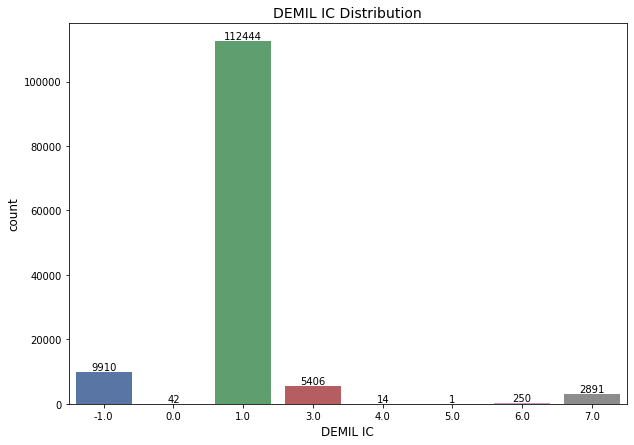

In [ ]:
plt.figure(figsize=(10,7))
ax = sns.countplot(data=data, x='DEMIL IC')
ax.bar_label(ax.containers[0])
ax.set_title('DEMIL IC Distribution', size=14)
ax.set_xlabel('DEMIL IC', size=12)
ax.set_ylabel('count', size=12)
plt.show()

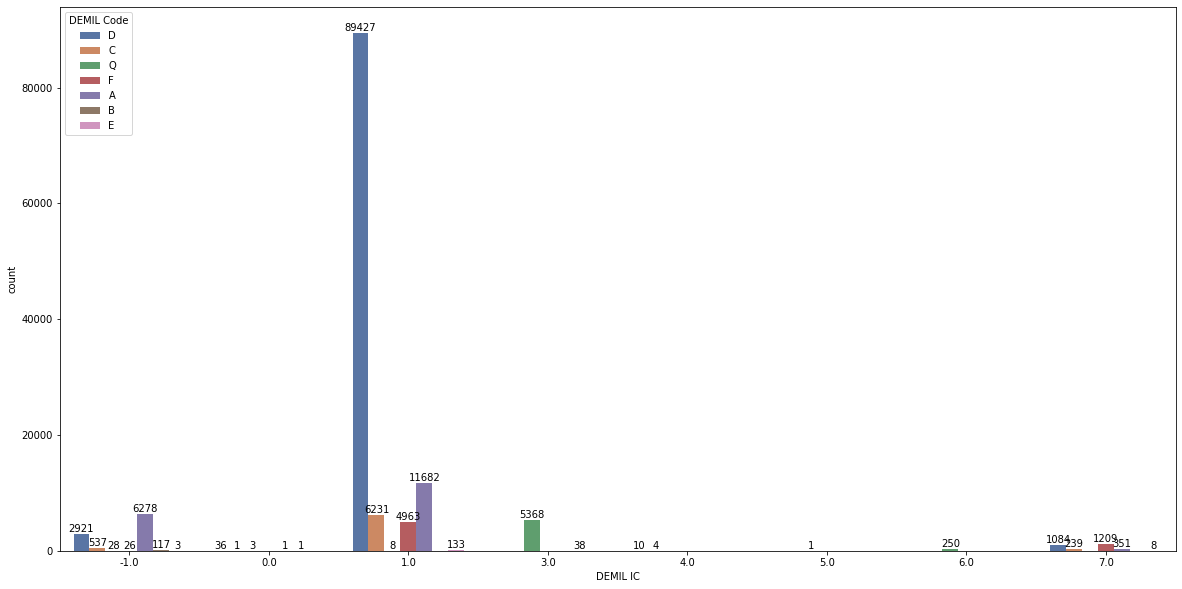

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.countplot(x='DEMIL IC', data=eda_data, hue='DEMIL Code')
for bars in ax.containers:
        ax.bar_label(bars)

* DEMIL IC 1 makes up 85% of the transfers and most DEMIL Codes belong to it.
* DEMIL IC 6 is only used for DEMIL Code Q.
* DEMIL IC -1 is mostly used for DEMIL Code A.

### Distribution of DEMIL IC Values Over DEMIL Code Values

In [ ]:
pd.crosstab(index=data['DEMIL Code'], columns=data['DEMIL IC'], values=data['DEMIL IC'], aggfunc='count', normalize='columns')

DEMIL IC,-1.0,0.0,1.0,3.0,4.0,5.0,6.0,7.0
DEMIL Code,,,,,,,,
A,0.633502,0.023810,0.103892,0.000000,0.000000,0.0,0.0,0.121411
B,0.011806,0.023810,0.000000,0.007029,0.000000,0.0,0.0,0.000000
C,0.054188,0.023810,0.055414,0.000000,0.285714,0.0,0.0,0.082670
D,0.294753,0.857143,0.795303,0.000000,0.714286,0.0,0.0,0.374957
E,0.000303,0.000000,0.001183,0.000000,0.000000,0.0,0.0,0.002767
F,0.002624,0.000000,0.044138,0.000000,0.000000,0.0,0.0,0.418194
Q,0.002825,0.071429,0.000071,0.992971,0.000000,1.0,1.0,0.000000


* 63% of non-reviewed DEMIL Codes (DEMIL IC -1) are code ‘A’.
* DEMIL IC 0 and 1 are mostly for DEMIL Code ‘D’.
* DEMIL IC 3 is 99% for DEMIL Codes ‘Q’ and DEMIL IC 6 is all for DEMIL Codes ‘Q’. This is expected given the definition of ‘Q’.
* All DEMIL IC 5 are for DEMIL Code ‘Q’.
* 42% of DEMIL IC 7 are for DEMIL Code ‘F’.

### Distribution of DEMIL Code Values Over Different DEMIL IC Values

In [ ]:
pd.crosstab(index=data['DEMIL Code'], columns=data['DEMIL IC'], values=data['DEMIL IC'], aggfunc='count', normalize='index')

DEMIL IC,-1.0,0.0,1.0,3.0,4.0,5.0,6.0,7.0
DEMIL Code,,,,,,,,
A,0.342835,0.000055,0.637942,0.000000,0.000000,0.000000,0.000000,0.019168
B,0.750000,0.006410,0.000000,0.243590,0.000000,0.000000,0.000000,0.000000
C,0.076583,0.000143,0.888620,0.000000,0.000570,0.000000,0.000000,0.034084
D,0.031248,0.000385,0.956664,0.000000,0.000107,0.000000,0.000000,0.011596
E,0.020833,0.000000,0.923611,0.000000,0.000000,0.000000,0.000000,0.055556
F,0.004195,0.000000,0.800742,0.000000,0.000000,0.000000,0.000000,0.195063
Q,0.004949,0.000530,0.001414,0.948745,0.000000,0.000177,0.044185,0.000000


* 34% of code ‘A’ and 75% of code ‘B’ were not reviewed (DEMIL IC -1).
* The rest of the codes excluding ‘Q’ mostly had IC of 1. Most transfers possess high integrity.
* 95% of code ‘Q’ had IC of 3. This means that 95% of code ‘Q’ items require mutilation inside of the US too.

### DEMIL Code Ordered by Total Acquisition Value Transferred

In [ ]:
data.groupby('DEMIL Code')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'])

,Acquisition Value
DEMIL Code,
E,3.426224e+04
B,2.351485e+06
F,5.618198e+07
A,8.865112e+07
Q,1.840856e+08
D,1.968024e+08
C,1.195331e+09


### DEMIL IC Ordered by Total Acquisition Value Transferred

In [ ]:
data.groupby('DEMIL IC')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'])

,Acquisition Value
DEMIL IC,
5.0,3.347000e+03
4.0,2.551941e+05
0.0,3.550394e+05
6.0,2.528442e+07
7.0,6.423735e+07
3.0,1.589664e+08
-1.0,2.014019e+08
1.0,1.272934e+09


* Items with non-validated DEMIL Codes (DEMIL IC 4) have the second highest acquisition value transferred.

### DEMIL Code Ordered by Total Quantity Ordered

In [ ]:
data.groupby('DEMIL Code')[['Quantity']].sum().sort_values(by='Quantity')

,Quantity
DEMIL Code,
E,803
B,1040
F,7999
C,11940
Q,26871
A,218990
D,279792


* Code ‘A’ items, which make up most of the non reviewed items (DEMIL IC -1), have the second highest quantities transferred/ordered (by local agencies).

### DEMIL IC Ordered by Total Quantity Ordered

In [ ]:
data.groupby('DEMIL IC')[['Quantity']].sum().sort_values(by='Quantity')

,Quantity
DEMIL IC,
5.0,4
4.0,21
0.0,368
6.0,870
7.0,8320
3.0,26097
-1.0,64779
1.0,446976


* Items with non-validated DEMIL Codes (DEMIL IC 4) have the second highest quantities transferred.

## Acquisition Value, Quantity and Time Series Analyses

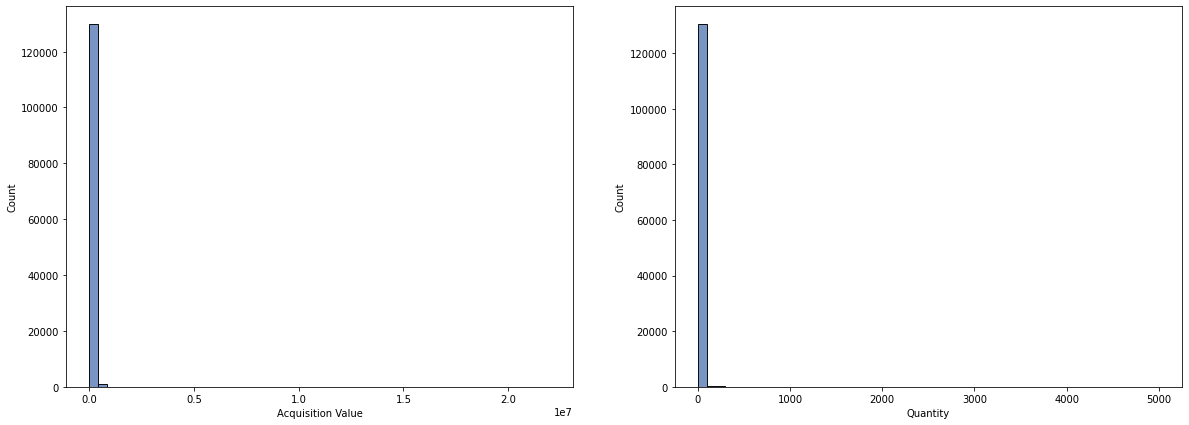

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))
sns.histplot(eda_data['Acquisition Value'], bins=50, ax=axs[0])
sns.histplot(eda_data['Quantity'], bins=50, ax=axs[1])
plt.show()

* Acquisition value and Quantity have extreme outliers as they are heavily right skewed.

### Time Series Analysis

In [ ]:
time_series = eda_data.set_index('Ship Date')

In [ ]:
time_series = time_series.sort_index()

In [ ]:
time_series.head()

,State,Agency Name,NSN,Item Name,Quantity,UI,Acquisition Value,DEMIL Code,DEMIL IC,Station Type
Ship Date,,,,,,,,,,
1980-01-01 09:07:07,NY,GREECE PD,2320-01-074-7642,"TRUCK,ARMORED",1,Each,65070.0,C,1.0,State
1990-05-03 00:00:00,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,State
1990-05-03 00:00:00,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,State
1990-05-03 00:00:00,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,State
1990-05-03 00:00:00,MT,HIGHWAY PATROL HELENA,1005-00-589-1271,"RIFLE,7.62 MILLIMETER",1,Each,138.0,D,1.0,State


In [ ]:
time_series_monthly  = time_series.groupby(pd.Grouper(freq="M")).sum()

In [ ]:
time_series_monthly.head()

,Quantity,Acquisition Value
Ship Date,,
1980-01-31,1,65070.0
1980-02-29,0,0.0
1980-03-31,0,0.0
1980-04-30,0,0.0
1980-05-31,0,0.0


In [ ]:
time_series_monthly_av = time_series_monthly['Acquisition Value']
time_series_monthly_q = time_series_monthly['Quantity']

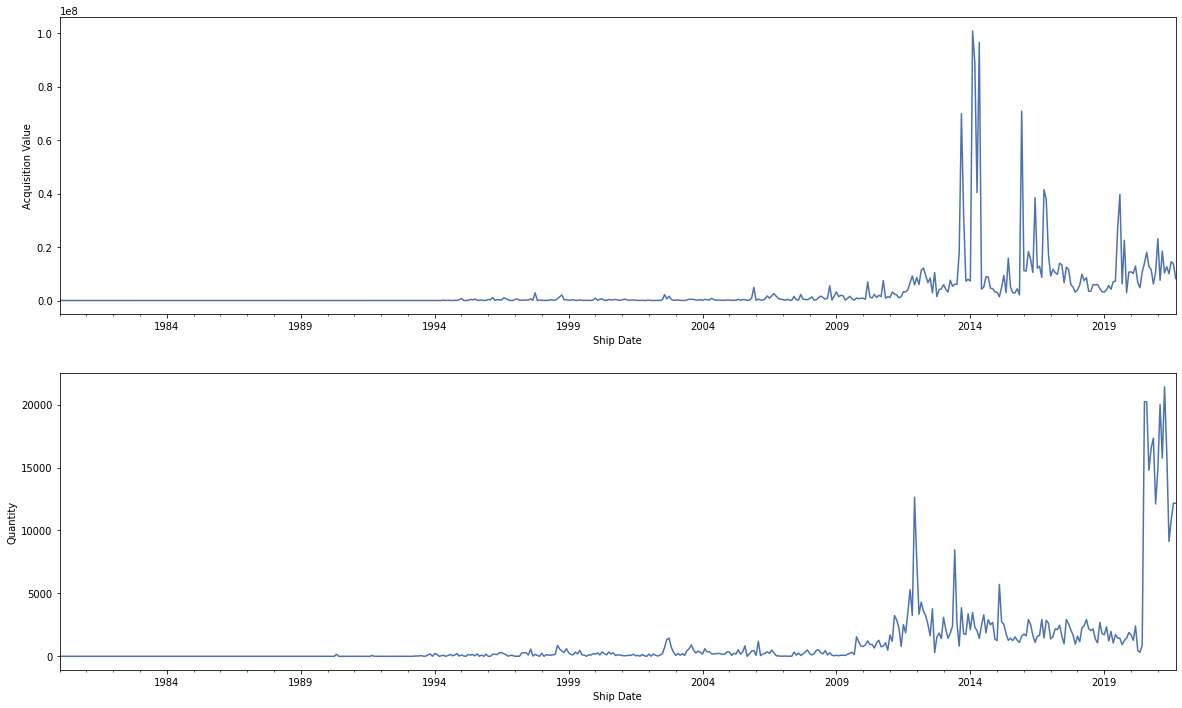

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20,12))
time_series_monthly_av.plot(ax=axs[0])
axs[0].set_ylabel("Acquisition Value")
time_series_monthly_q.plot(ax=axs[1])
axs[1].set_ylabel("Quantity")
plt.show()

* There is no seasonality in acquisition values or quantities over time.

#### Smoothing Using Simple Moving Average

Smoothing gives a clearer picture of the trend of non-seasonal data

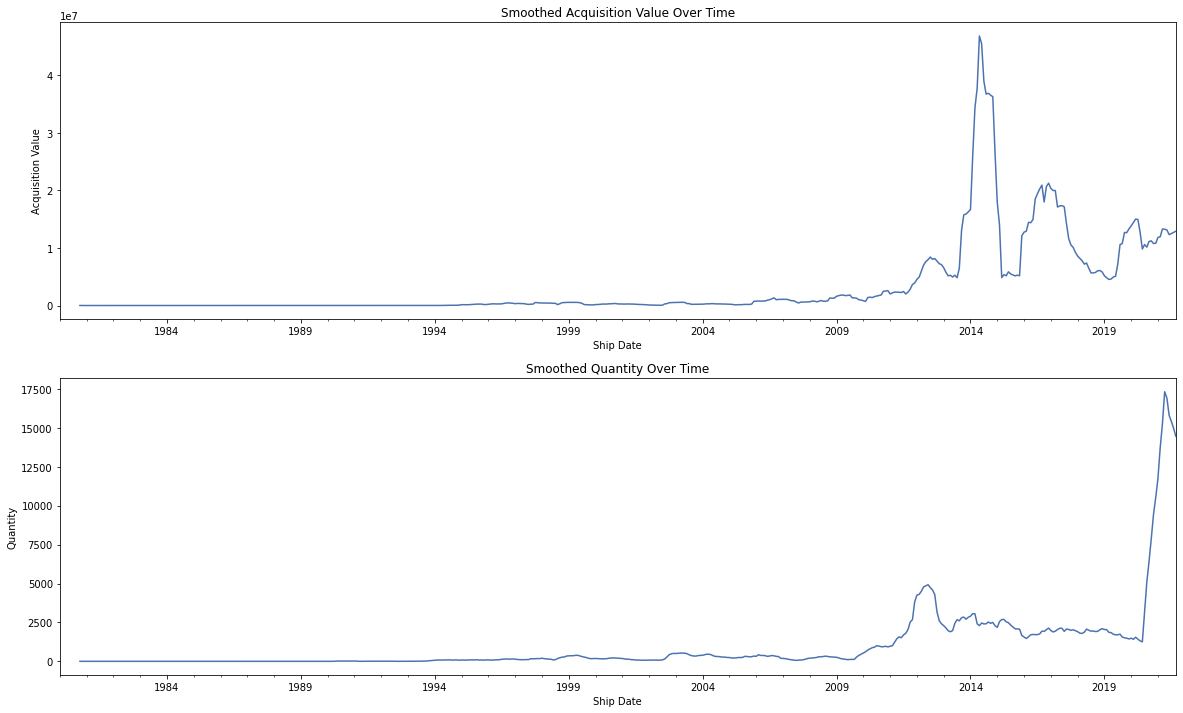

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20,12))
monthly_av_rolling = time_series_monthly_av.rolling(window=10).mean().plot(ax=axs[0])
axs[0].set_ylabel("Acquisition Value")
axs[0].set_title("Smoothed Acquisition Value Over Time")

monthly_q_rolling = time_series_monthly_q.rolling(window=10).mean().plot(ax=axs[1])
axs[1].set_ylabel("Quantity")
axs[1].set_title("Smoothed Quantity Over Time")
plt.show()

* Smoothing the acquisition value and quantity time serieses using simple moving averages of order 10 better revealed the upward/positive trend of the data. Acquisition values and quantities transferred are increasing with time.

#### Structural Breaks

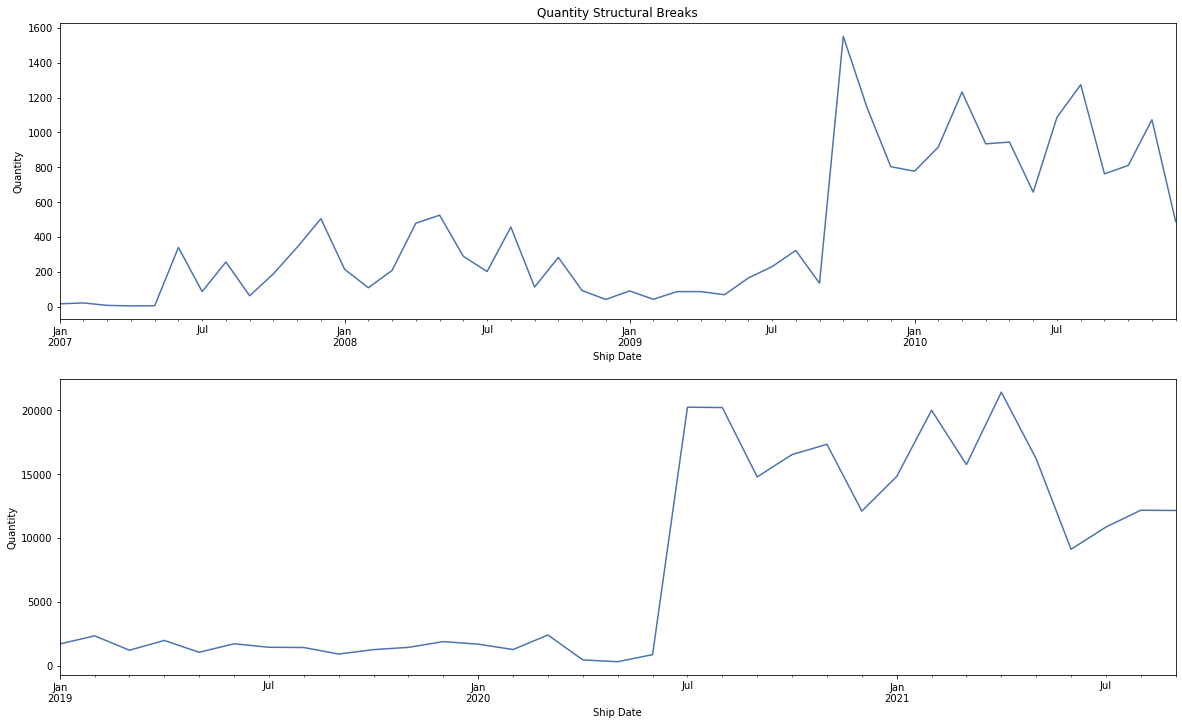

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(20, 12))
time_series_monthly_q.loc[(time_series_monthly_q.index.year >= 2007) & (time_series_monthly_q.index.year < 2011)].plot(ax=axs[0])
axs[0].set_ylabel("Quantity")
axs[0].set_title("Quantity Structural Breaks")

time_series_monthly_q.loc[time_series_monthly_q.index.year >= 2019].plot(ax=axs[1])
axs[1].set_ylabel("Quantity")
plt.show()

* A structural break in monthly quantity values happened in September 2009, mean quantities transferred increased after it.
* A structural break in monthly quantity values happened in June 2020, mean quantities transferred significantly increased after it.

## State Related Analyses

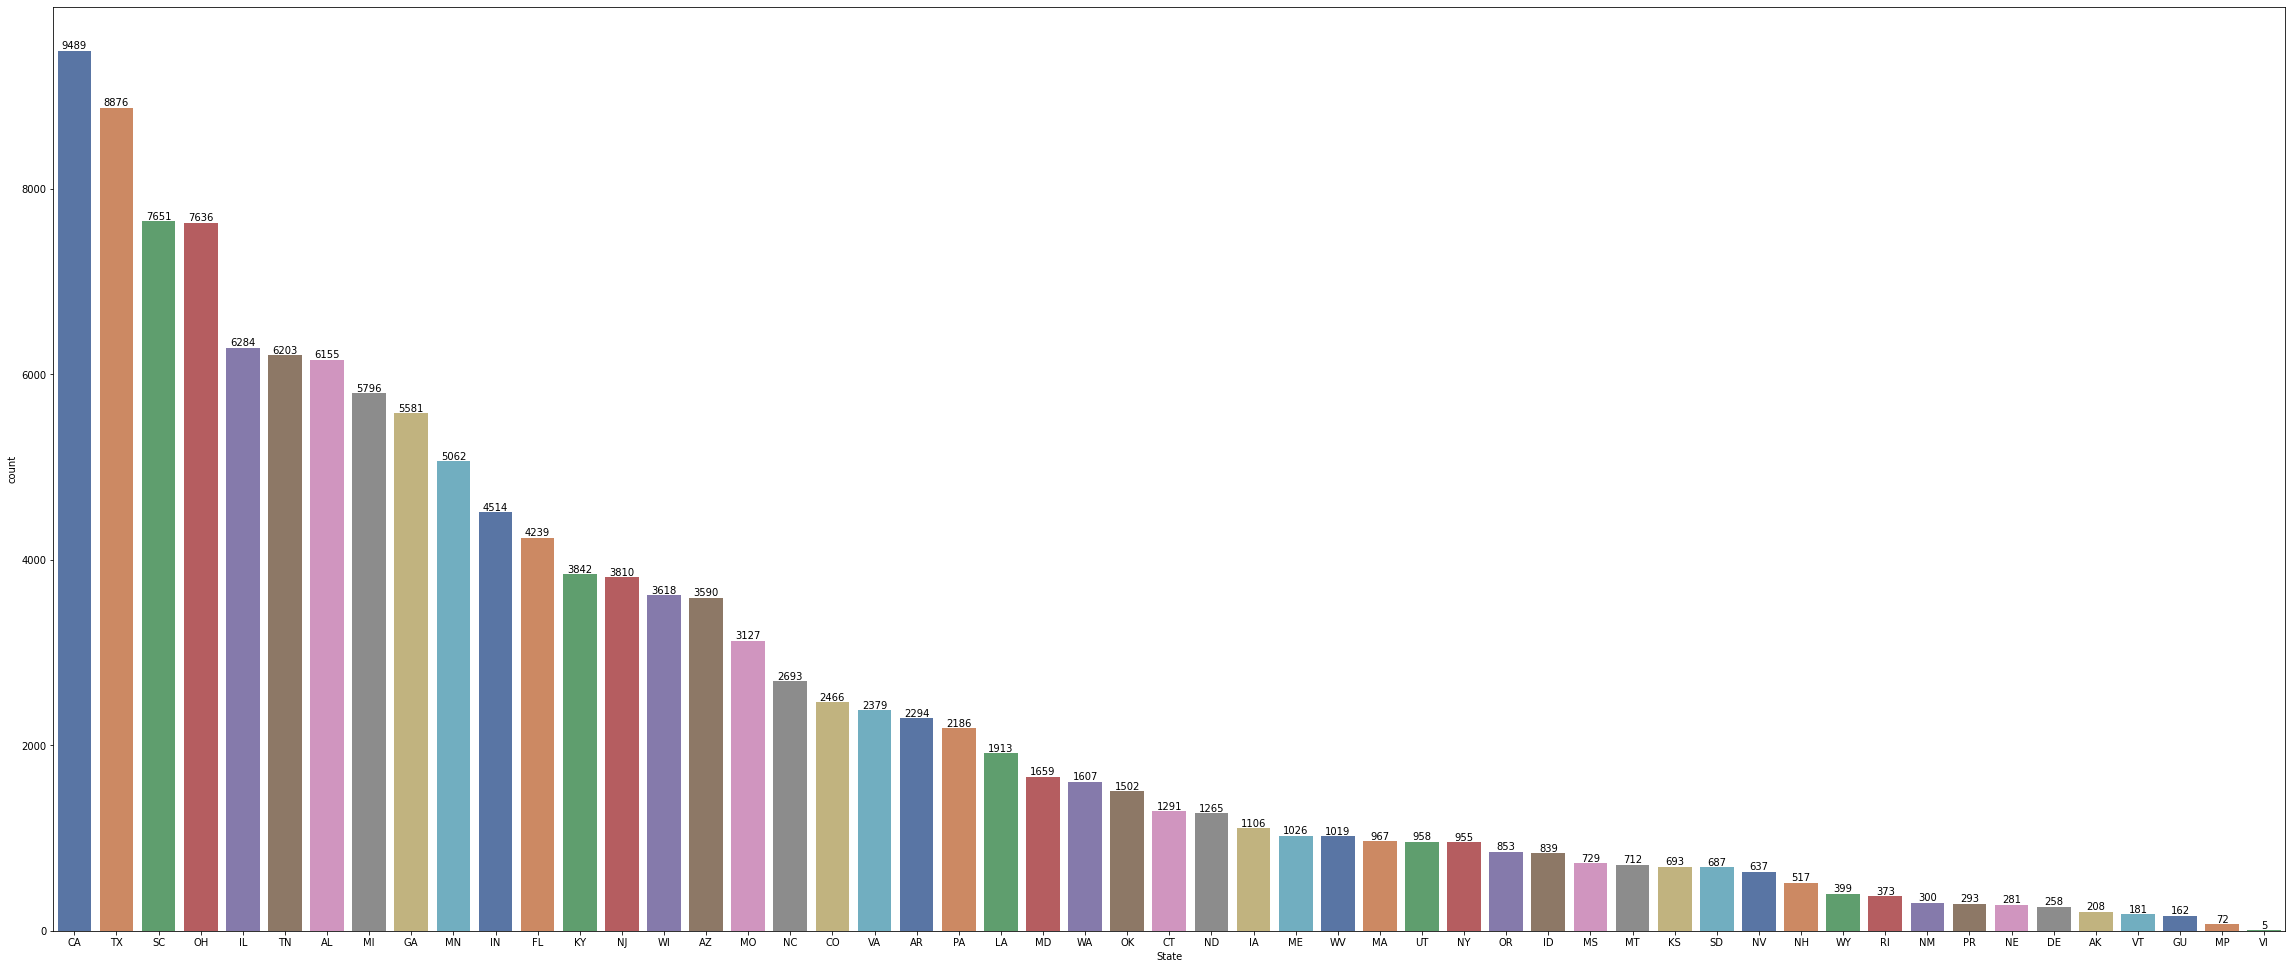

In [ ]:
plt.figure(figsize = (40,17))
ax = sns.countplot(x='State', data=eda_data, palette=color_pal, order=data['State'].value_counts().index)
for bars in ax.containers:
        ax.bar_label(bars)

* The states WY, RI, NM, PR, NE, DE, AK, VT, GU, MP, VI had the lowest number of items transferred to them.
* CA, TX, SC, CH and IL are the states with the highest number of transfers.

### Agencies with Highest Number of Transfers Made to them in Each State

In [ ]:
pd.set_option("display.max_rows", None)

In [ ]:
data.groupby('State')['Agency Name'].value_counts().groupby(level=0, group_keys=False).head(5)

State  Agency Name                        
AK     ANCHORAGE POLICE DEPARTMENT             113
       ALASKA DEPT OF PUBLIC SAFETY             73
       JUNEAU POLICE DEPARTMENT                 15
       HAINES BOROUGH POLICE DEPT                5
       FAIRBANKS POLICE DEPT                     1
AL     TUSCALOOSA POLICE DEPT                  595
       DALE COUNTY SHERIFF OFFICE              234
       OXFORD POLICE DEPT                      212
       TUSCUMBIA POLICE DEPT                   179
       HOMEWOOD POLICE DEPT                    141
AR     ARKANSAS LAW ENF TRAINING ACADEMY       172
       GRANT COUNTY SHERIFFS OFFICE            135
       NORTH LITTLE ROCK POLICE DEPT           128
       BENTON POLICE DEPARTMENT                126
       BRYANT POLICE DEPT                      120
AZ     ARIZONA DEPT OF PUBLIC SAFETY           696
       MESA POLICE DEPT                        476
       BUCKEYE POLICE DEPT                     239
       PINAL COUNTY SHERIFF OFFICE     

### Agencies with lowest Number of Transfers Made to them in Each State

In [ ]:
data.groupby('State')['Agency Name'].value_counts(ascending=True).groupby(level=0, group_keys=False).head(5)

State  Agency Name                        
AK     FAIRBANKS POLICE DEPT                   1
       NORTH POLE POLICE DEPT                  1
       HAINES BOROUGH POLICE DEPT              5
       JUNEAU POLICE DEPARTMENT               15
       ALASKA DEPT OF PUBLIC SAFETY           73
AL     BULLOCK COUNTY SHERIFF DEPT             1
       DAUPHIN ISLAND POLICE DEPT              1
       ELMORE COUNTY  SHERIFF OFFICE           1
       GARDENDALE POLICE DEPT                  1
       HAYDEN POLICE DEPARTMENT                1
AR     BAUXITE POLICE DEPT                     1
       BOONE COUNTY SHERIFF DEPT               1
       FORT SMITH POLICE DEPARTMENT            1
       HOPE POLICE DEPT                        1
       HUNTSVILLE POLICE DEPT                  1
AZ     CHANDLER POLICE DEPT                    1
       CITY OF MARICOPA POLICE DEPARTMENT      1
       EL MIRAGE POLICE DEPT                   1
       HAYDEN POLICE DEPT                      1
       SAHUARITA POLICE DE

### Top Items Ordered by each State

In [ ]:
data.groupby('State')['Item Name'].value_counts().groupby(level=0, group_keys=False).head(10)

State  Item Name                                             
AK     RIFLE,5.56 MILLIMETER                                       70
       RIFLE,7.62 MILLIMETER                                       13
       Mittens, cold weather                                        8
       LINER,WET WEATHER PONCHO                                     5
       TARPAULIN                                                    5
       UNMANNED VEHICLE,GROUND                                      5
       GLOVES,COLD WEATHER                                          4
       TROUSERS,EXTREME COLD WEATHER                                4
       PAPER,TOILET                                                 3
       SLEEPING BAG                                                 3
AL     RIFLE,5.56 MILLIMETER                                     1388
       PISTOL,CALIBER .45,AUTOMATIC                               417
       RIFLE,7.62 MILLIMETER                                      332
       SIGHT,REFLEX         

### States with Highest Quantities Ordered in each Year

In [ ]:
data.groupby([data['Ship Date'].dt.year, 'State'])['Quantity'].sum().to_frame().sort_values(by=['Ship Date','Quantity'], ascending=[True, False]).groupby(level=0, group_keys=False).head(5)

Quantity
Ship Date State          
1980      NY            1
1990      MT          167
1991      WY           69
          MO            4
1992      AZ            3
1993      KY           90
          SD           63
          CT           48
          ND           36
          NH           28
1994      OH          105
          CO           84
          RI           76
          IL           74
          LA           74
1995      MN          209
          ND           81
          MI           75
          OH           71
          IN           68
1996      SD          220
          WI          204
          MN          146
          IN          140
          TN           86
1997      CA          481
          MN          127
          NC           96
          WI           96
          IN           78
1998      CA          685
          TN          230
          GA          214
          FL          210
          AR          191
1999      CA          383
          FL          229
          GA          190
          MI          125
          TN           93
2000      MI          276
          GA          183
          WI          168
          IL          165
          TX          152
2001      TX          108
          CA           97
          FL           66
          WI           55
          MI           42
2002      CA          881
          AL          445
          TN          435
          GA          385
          IL          374
2003      OH          864
          IN          379
          IL          277
          NJ          262
          GA          225
2004      IN          392
          CA          348
          OH          298
          KY          222
          GA          197
2005      IL          541
          FL          515
          IN          428
          MN          322
          KY          217
2006      OH          635
          IL          496
          MO          227
          KY          172
          MI          158
2007      SC          252
          IL          250
          WI          212
          MI          195
          LA          185
2008      GA          365
          IL          323
          OH          317
          CA          220
          AZ          184
2009      TN          776
          CA          475
          OH          388
          IN          385
          WA          366
2010      TX         1255
          CA         1072
          SC          960
          IL          736
          IN          701
2011      OH         7400
          CA         7064
          AZ         3706
          TX         3326
          KY         2768
2012      AL         4192
          MI         2955
          CA         2906
          AZ         2886
          TX         2696
2013      GA         9740
          TX         3265
          AL         2168
          SC         1660
          MI         1535
2014      CA         2903
          TX         2849
          NJ         2154
          SC         2065
          IL         1995
2015      GA         5007
          TX         2277
          TN         1663
          SC         1241
          CA         1133
2016      TX         3123
          TN         2425
          AL         1377
          GA         1293
          FL         1275
2017      SC         3736
          TX         2574
          CA         1952
          MI         1287
          WI         1236
2018      SC         4997
          NJ         1983
          TX         1740
          MN         1595
          MO         1518
2019      SC         3118
          MN         2315
          TX         1861
          CA         1223
          NJ          961
2020      CA        34979
          NC         7461
          NJ         7340
          MN         7029
          TX         7001
2021      CA        28035
          TX        12605
          AL        10507
          SC         7629
          AZ         7627

### States with Highest Aquisition Value in each Year

In [ ]:
data.groupby([data['Ship Date'].dt.year, 'State'])['Acquisition Value'].sum().to_frame().sort_values(by=['Ship Date','Acquisition Value'], ascending=[True, False]).groupby(level=0, group_keys=False).head(5)

Acquisition Value
Ship Date State                   
1980      NY              65070.00
1990      MT              23046.00
1991      WY               9522.00
          MO                552.00
1992      AZ               7261.80
1993      KY              12420.00
          SD               8694.00
          CT               6624.00
          WY               5255.00
          ND               4968.00
1994      NV             191835.00
          CA             137761.00
          GA             101612.00
          NC              66312.00
          MO              65484.00
1995      IL             574967.00
          AL             572451.00
          GA             297182.00
          OH             170204.00
          MN             161844.00
1996      NY            1099260.00
          FL             728086.00
          CA             607255.00
          TN             401683.00
          MT             341940.00
1997      NV            2029988.00
          FL            1371405.00
          CA             498303.00
          TN             394598.00
          SC             157576.00
1998      FL             916696.00
          ID             828268.00
          IN             409364.00
          CA             369360.10
          OR             360539.00
1999      CA             374095.56
          FL             142291.49
          CO             132142.20
          NM              92566.00
          MN              85153.42
2000      FL             813429.00
          MD             465671.23
          MI             365985.13
          CO             268460.48
          WA             201125.21
2001      FL             348061.00
          CA             328714.00
          NC             205374.84
          OK             203070.00
          TN             142559.71
2002      CA            1892362.58
          WA            1405132.26
          AL             181277.48
          IL             160316.84
          IN             157997.95
2003      OH             396240.24
          FL             281163.10
          WV             244120.00
          IN             222479.34
          VA             171230.26
2004      AL             566713.00
          CA             467124.00
          TN             226879.00
          MT             145778.79
          IN             117920.37
2005      CA            4409208.00
          MD             532224.00
          IN             481981.86
          IL             299393.43
          AL             292905.00
2006      AL            2019891.69
          KY            1990046.90
          TN            1124963.92
          NC             966062.00
          SC             892771.42
2007      CA            1315798.20
          NM            1023994.00
          AL             696793.68
          WA             525070.00
          FL             425047.00
2008      CA            6123134.25
          FL            2077560.00
          WA            1089755.86
          IN             854341.05
          AL             691603.66
2009      CA            4788637.23
          IN            2062679.32
          GA            1901754.19
          LA            1252955.80
          AR             807022.00
2010      CA            7658749.63
          TX            6520957.58
          FL            2595930.66
          TN            1581847.24
          CT             927504.10
2011      CA            5034731.50
          AZ            3554830.82
          IL            3287608.34
          TN            3087692.69
          AL            2743155.25
2012      AL            8628179.06
          CA            7312548.37
          OH            5160878.17
          IL            4527654.07
          TX            4495385.38
2013      FL           12424354.30
          TX           10976850.73
          CA           10791197.89
          AL           10245192.27
          TN            9391386.85
2014      TX           44474063.82
          OH           30705992.37
          TN           2837

## Item Related Analyses

### Top Ordered Items

<AxesSubplot: >

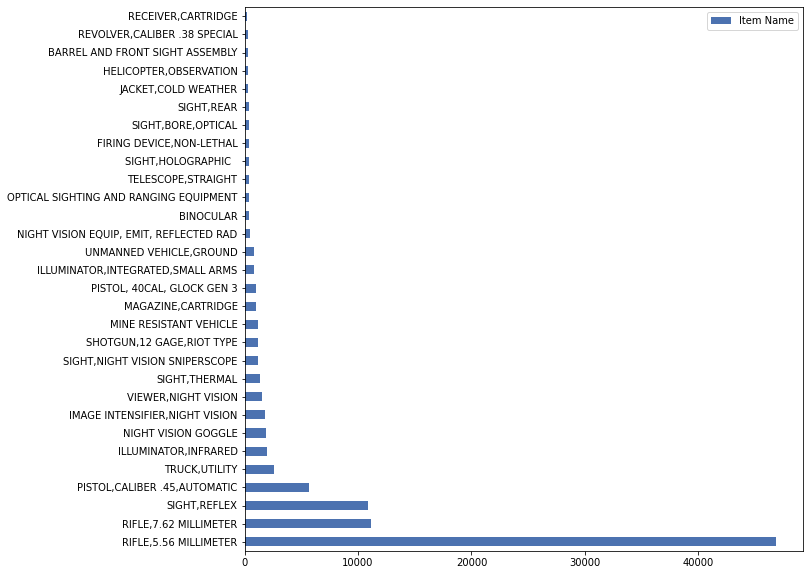

In [ ]:
data['Item Name'].value_counts().to_frame().head(30).plot.barh(figsize=(10,10))

### Top Items By Acquisition Value Transferred

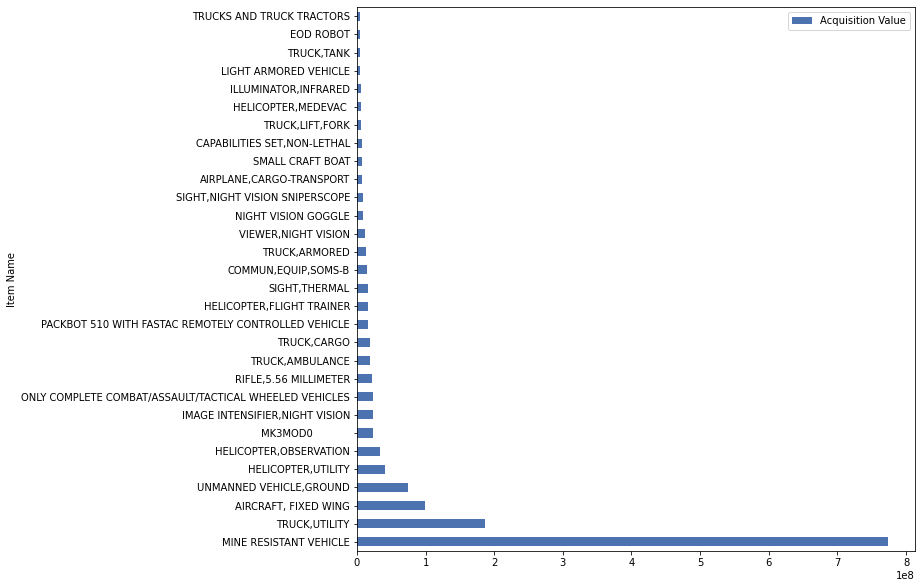

In [ ]:
data.groupby('Item Name')[['Acquisition Value']].sum().sort_values(by=['Acquisition Value'], ascending=False).head(30).plot.barh(figsize=(10,10))

### Top Items By Quantity Transferred

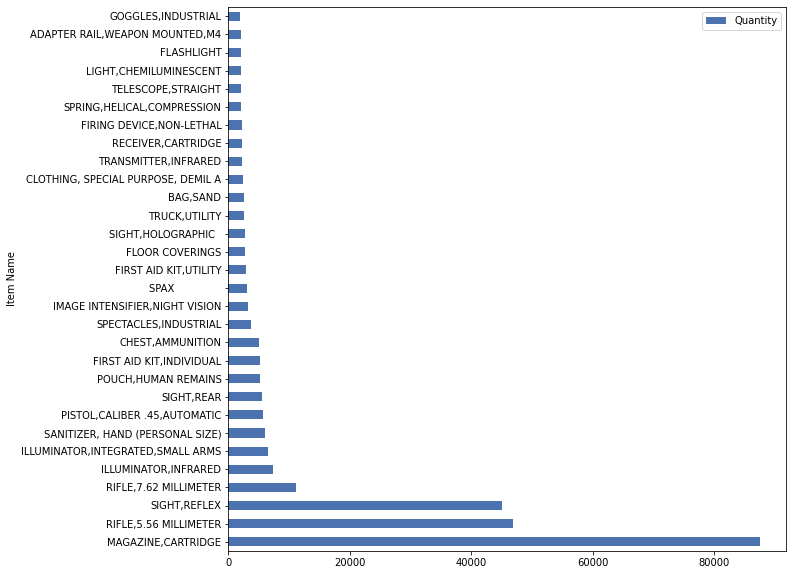

In [ ]:
data.groupby('Item Name')[['Quantity']].sum().sort_values(by=['Quantity'], ascending=False).head(30).plot.barh(figsize=(10,10))

# Analysis Summary

## Patterns Found in the Data
* Quantities of items ordered by agencies/transferred to agencies and the amount of acquisition values transferred are in an upward trend. Demand is only increasing.
* Three out of the five topmost transferred items are weapons (rifles and pistols), indicating increased militarization of local police enforcements.
* 63% of non-reviewed DEMIL Codes (DEMIL IC -1) are code ‘A’.
* 34% of code ‘A’ and 75% of code ‘B’ were not reviewed (DEMIL IC -1).
* 42% of DEMIL IC 7 are for DEMIL Code ‘F’.

## Recommendations Based on Findings
* It is recommended to increase scrutiny on the integrity of the demilitarized code as items that are subject to the least demilitarization (code A) are the ones with lowest integrity checks (not reviewed, no DEMIL IC provided).
* It is recommended to investigate why most codes that ICP has not responded to collaboration request in changing them (over 90 days old) or failed to update them in the ICPs legacy system (this is the description of DEMIL IC 7) are codes of class F.
* Since one of the KPIs of the LDA is to increase service readiness and supply availability of its agencies (as found on the LDA’s website), it is recommended to survey the states as well as the agencies across the states that have the least number of transfers/orders associated with them about the reasons behind them only ordering few equipment/items and how the LDA services can be improved to enable them to order more to better meet their needs.

## Special Cases to Consider
* Structural changes have happened in the gross quantities ordered/transferred in both September 2009 and June 2020. These structural changes should be further analyzed to uncover reasons behind these structural changes to be more ready for the next structural change and the increase in demand (quantities ordered) that is anticipated to come after it.